# DBSCAN Clustering of Taxi Stands

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Örnek taksi durağı koordinat verileri oluşturma (daha gerçekçi yoğunluklarla)
np.random.seed(0)

# Belirli bölgelerde yoğunlaşmış veriler oluşturma
center_1 = np.random.randn(300, 2) * 0.75 + np.array([5, 5])
center_2 = np.random.randn(300, 2) * 0.25 + np.array([0, 0])
center_3 = np.random.randn(300, 2) * 0.5 + np.array([-5, -5])

coords = np.vstack([center_1, center_2, center_3])


In [6]:

# Verilerin normalize edilmesi
scaler = StandardScaler()
scaled_coords = scaler.fit_transform(coords)


In [7]:

# DBSCAN modelinin tanımlanması ve eğitilmesi
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(scaled_coords)

# Sonuçların dataframe'e eklenmesi
df = pd.DataFrame(coords, columns=['x', 'y'])
df['cluster'] = clusters


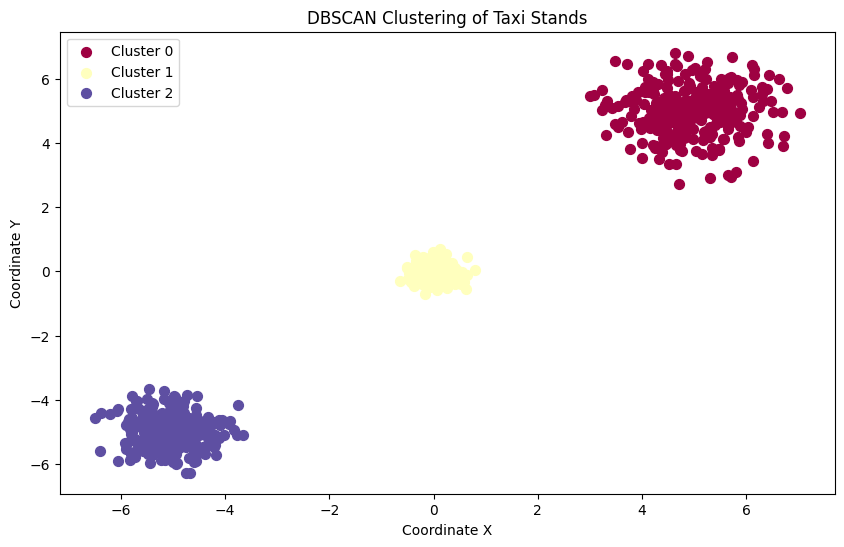

In [8]:

# Clustering sonuçlarının görselleştirilmesi
plt.figure(figsize=(10, 6))
unique_clusters = np.unique(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_clusters))]

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:
        color = [0, 0, 0, 1]  # Gürültü noktaları siyah renk ile
    mask = (clusters == cluster)
    plt.scatter(coords[mask, 0], coords[mask, 1], c=[color], label=f'Cluster {cluster}', s=50)

plt.title('DBSCAN Clustering of Taxi Stands')
plt.xlabel('Coordinate X')
plt.ylabel('Coordinate Y')
plt.legend()
plt.show()
